In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('datasets/HeartDisease/Cleavland.csv')

In [3]:
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
first_row = df.columns

In [5]:
headers = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slpoe', 'ca', 'thal', 'num']

In [6]:
df.columns = headers

In [7]:
df.loc[len(df)] = first_row

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


<h3>1. Data Cleaning</h3>

In [9]:
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
df = df[df['ca'] != '?']

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [12]:
df = df.drop_duplicates()

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,299,299,299
unique,42.0,3.0,5.0,51.0,153.0,3.0,4.0,92.0,3.0,41.0,4.0,5,4,6
top,58.0,1.0,4.0,120.0,234.0,0.0,0.0,162.0,0.0,0.0,1.0,0.0,3.0,0
freq,18.0,201.0,143.0,37.0,6.0,255.0,148.0,11.0,200.0,97.0,140.0,175,164,160


<h3>2. Error correction (Outlier detection and removal)</h3>

In [14]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

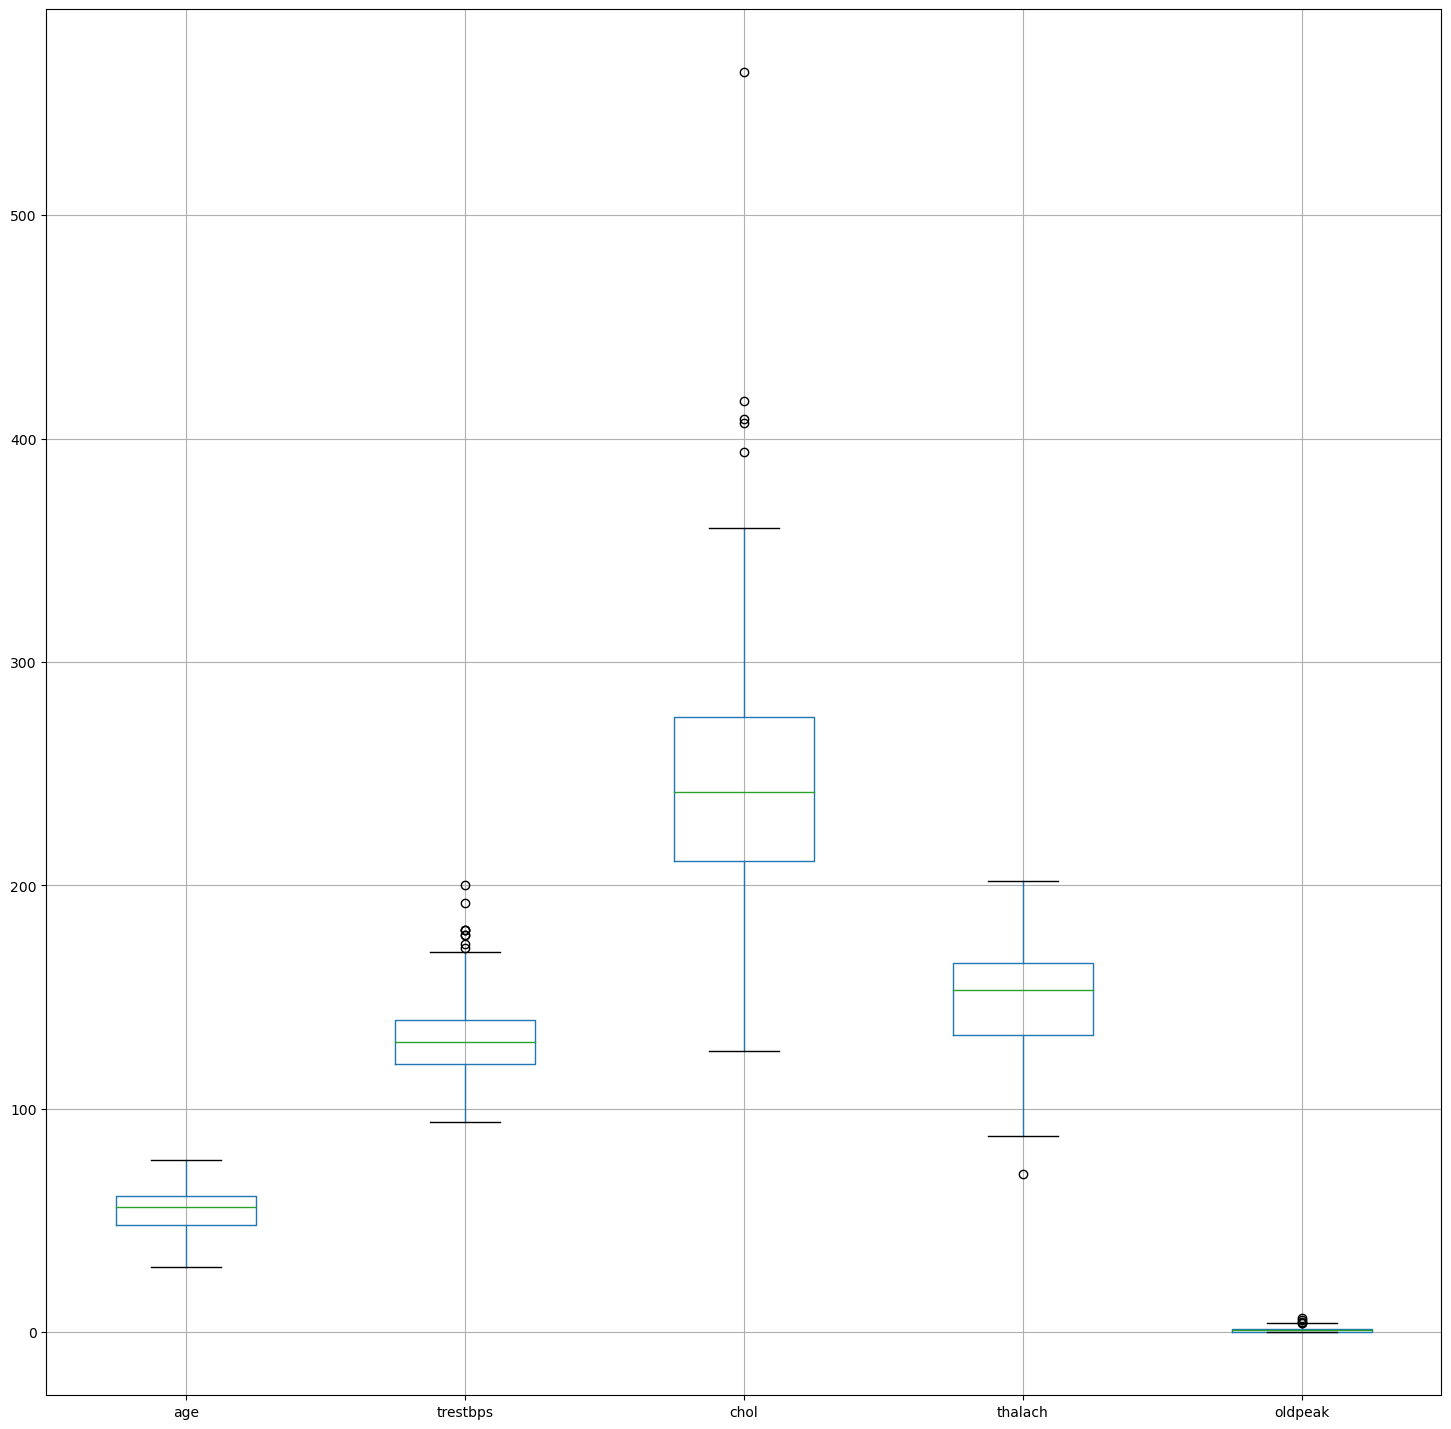

In [15]:
plt.figure(figsize=(18,18))
df[["age", "trestbps", "chol", "thalach", "oldpeak"]].boxplot()
plt.show()

In [16]:
def outliers_graph(df_column):
  Q75, Q25 = np.percentile(df_column, [75,25])
  IQR = Q75 - Q25
  print('Q25: ',Q25)
  print('Q75: ',Q75)
  print('Inter Quartile Range: ',IQR)
  print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
  print('Number of Rows with Left Extreme Outliers:', len(df[df_column < Q25-1.5*IQR]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column > Q75+1.5*IQR]))

In [17]:
outliers_graph(df["age"])

Q25:  48.0
Q75:  61.0
Inter Quartile Range:  13.0
Outliers lie before 28.5 and beyond 80.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [18]:
outliers_graph(df["trestbps"])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 9


In [19]:
df = df[((df['trestbps'] >= 90.0) & (df['trestbps'] <= 170.0))]

In [20]:
outliers_graph(df["chol"])

Q25:  211.0
Q75:  274.75
Inter Quartile Range:  63.75
Outliers lie before 115.375 and beyond 370.375
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 5


In [21]:
df = df[((df['chol'] >= 115.25) & (df['chol'] <= 370.25))]

In [22]:
outliers_graph(df["thalach"])

Q25:  132.0
Q75:  166.0
Inter Quartile Range:  34.0
Outliers lie before 81.0 and beyond 217.0
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 0


In [23]:
df = df[((df['thalach'] >= 81.0) & (df['thalach'] <= 217.0))]

In [24]:
outliers_graph(df["oldpeak"])

Q25:  0.0
Q75:  1.6
Inter Quartile Range:  1.6
Outliers lie before -2.4000000000000004 and beyond 4.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 4


In [25]:
df = df[((df['oldpeak'] >= -2.4) & (df['oldpeak'] <= 4.0))]

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


<h3>3. Model Building</h3>

In [27]:
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slpoe,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [28]:
x = df.drop(['num'], axis=1)
y = df['num']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

<h4>1. Linear Regression</h4>

In [30]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [31]:
print(f"Regression Score: {reg.score(x_test, y_test)}")

Regression Score: 0.4887484798585059


In [32]:
y_pred = reg.predict(x_test)

In [33]:
y_pred

array([ 1.26460032,  1.61376604,  1.1994596 ,  1.06101238,  0.26204632,
        0.45542649,  0.36305325,  1.92901508,  0.45846884, -0.05887344,
        1.98459363,  0.22763955,  0.26897696, -0.01422298,  0.32792174,
        2.18589649,  1.55351316,  0.58904637,  1.68738106, -0.52266374,
        0.32229376, -0.40097492,  2.52277963,  1.98852537,  0.29147227,
        1.21211717,  2.60666249,  1.35653153, -0.02284614,  1.79109751,
        0.1420351 ,  1.40423294,  0.01127746,  1.25354135,  0.68850851,
        2.31019892,  0.01744292,  1.44293137,  0.24129611,  1.20523805,
        0.28288042,  1.01620798,  1.48926808, -0.26172697,  1.12155392,
       -0.11546933,  1.27275504,  0.19928512,  1.11527344,  1.00442697,
        0.47851692,  1.06206626,  0.22042789,  1.28993534,  0.32080206,
        0.64415769,  1.03335171,  0.79661534,  2.79151184,  1.7879298 ,
        0.18846284,  0.07921977,  0.43434617,  0.31482925,  1.71352813,
       -0.03431083,  0.18297296,  0.5553249 ,  0.53628898,  0.81

In [34]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.6381056653336721
MSE: 0.7601388460607164
RMSE: 0.8718594187486399


<h4>2. KNN Classifier</h4>

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred_knn = knn.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
accuracy_score(y_pred_knn, y_test)

0.4523809523809524